<a href="https://colab.research.google.com/github/EdAkh/DNN_Energy_Efficiency_Model/blob/main/Energy_efficiency_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Efficiency Data Set

## Introduction

**Source:**
The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

**Data Set Information:**
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

## Libraries importation

In [1]:
#importing libraries
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler   
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Collection

### Loading data

In [3]:
#Load the data set from UCI
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

#Read the excel file and import it
data = pd.read_excel(URL)

#Display the dataframe "data"
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
#Searching missing values
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [5]:
#Statistical description of the values
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
#Changing the columns names
data.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


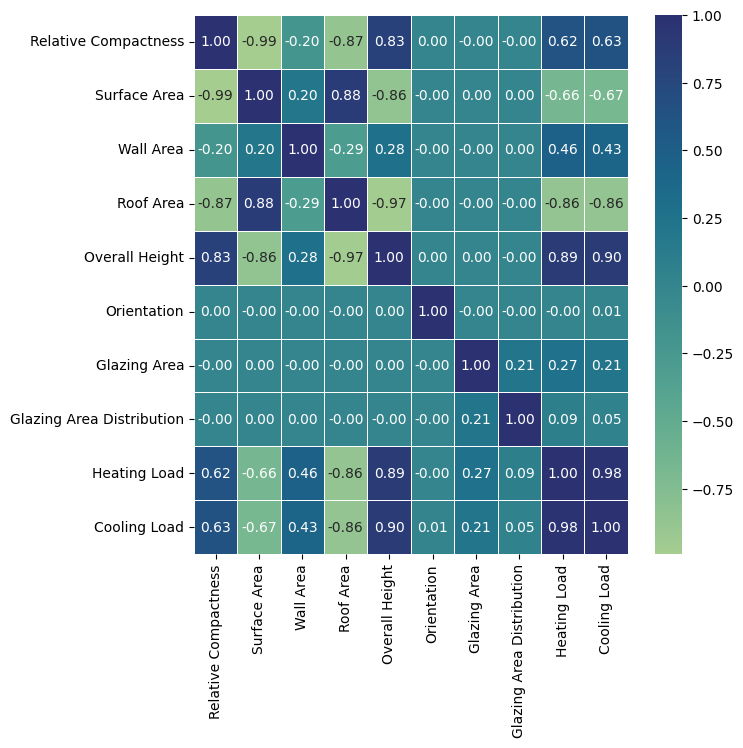

In [7]:
plt.figure(figsize=(7, 7))
corr_matrix = sns.heatmap(data.corr(), annot=True, cmap="crest", linewidth=.5, fmt=".2f")

In [8]:
X = data.iloc[:, :-2]
y1 = data.iloc[:, 8]
y2 = data.iloc[:, 9]

### Features histograms

<Figure size 640x480 with 0 Axes>

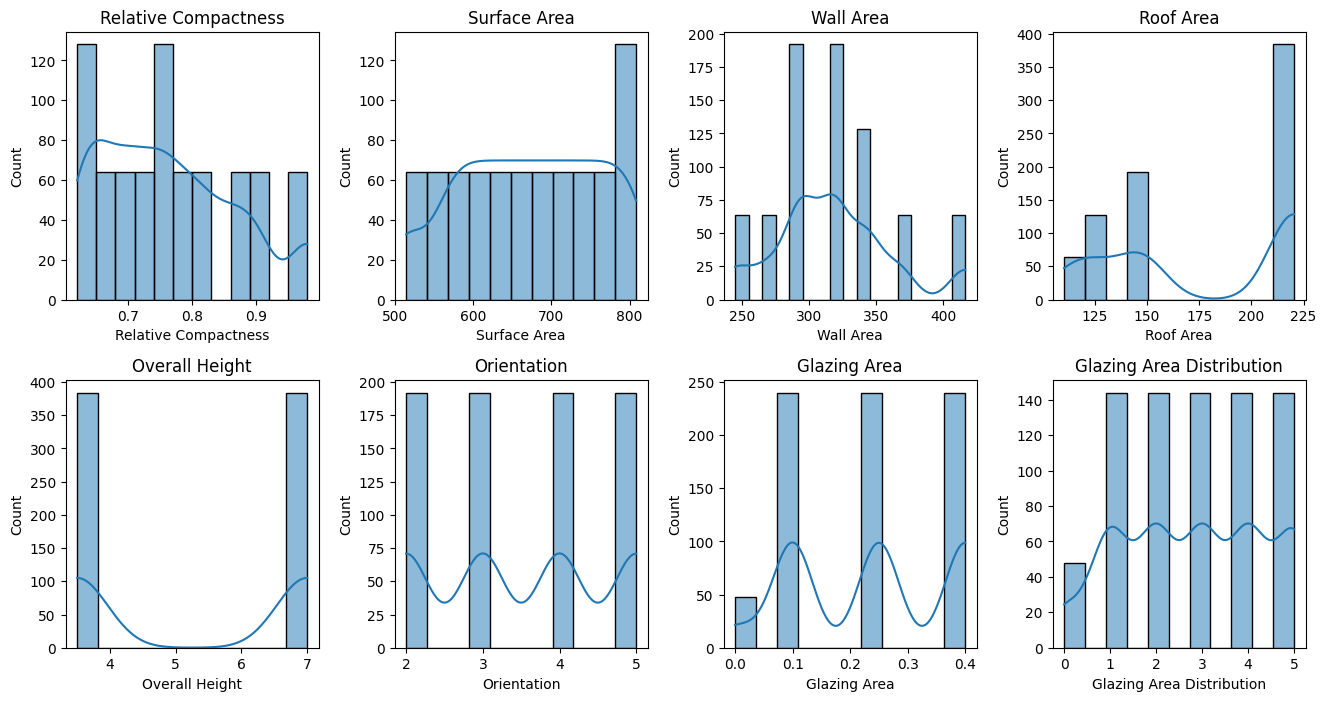

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes = axes.flatten()

for i, column in enumerate(X.columns):
    sns.histplot(X[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.figure()

### Responses histograms

<ipython-input-10-e362782bff34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y1, kde=True, color="red", hist_kws=dict(edgecolor="white"))


<Axes: xlabel='Heating Load', ylabel='Density'>

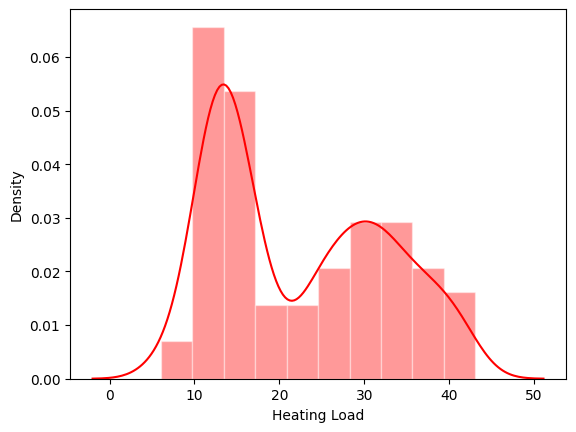

In [10]:
sns.distplot(y1, kde=True, color="red", hist_kws=dict(edgecolor="white"))

<ipython-input-11-5cb4c5f4ebec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y2, kde=True, color="blue", hist_kws=dict(edgecolor="white"))


<Axes: xlabel='Cooling Load', ylabel='Density'>

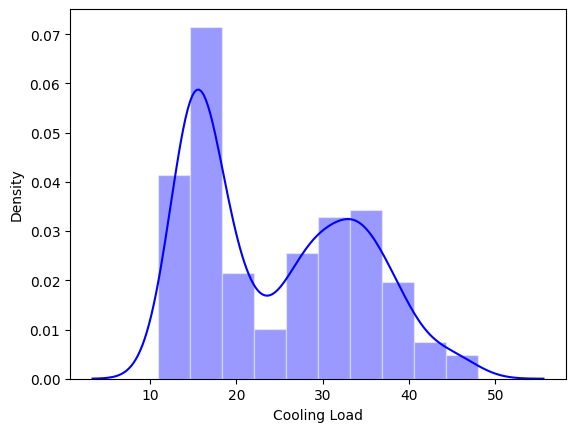

In [11]:
sns.distplot(y2, kde=True, color="blue", hist_kws=dict(edgecolor="white"))

## Data Preparation

### Data standardization

In [12]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.34164079,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -0.4472136 ,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ...,  0.4472136 ,
        -1.76044698, -1.81457514],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ..., -0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.34164079,
         1.2440492 ,  1.41133622]])

### Data splitting

In [13]:
y = data.iloc[:, 8:10]

In [14]:
#Spliting the features and targets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Custom Coefficient Of Determination

In [15]:
#Coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

## Model

### Model definition

In [16]:
#Define a sequential model with 8 inputs and 3 layers
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(8))),
model.add(tf.keras.layers.Dense(units=128, name='layer1', activation='relu')),
model.add(tf.keras.layers.Dense(units=128, name='layer2', activation='relu')),
model.add(tf.keras.layers.Dense(units=2, name='output', activation='relu')),

#Display the content the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               1152      
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 2)                 258       
                                                                 
Total params: 17,922
Trainable params: 17,922
Non-trainable params: 0
_________________________________________________________________


### Model configuration

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[r_square])

In [18]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Model training

In [19]:
#Train the model for the first target
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
39/39 [==============================] - 1s 9ms/step - loss: 543.4094 - r_square: -5.2538 - val_loss: 402.4108 - val_r_square: -3.3129
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 179.7592 - r_square: -0.9962 - val_loss: 52.8169 - val_r_square: 0.4479
Epoch 3/500
39/39 [==============================] - 0s 3ms/step - loss: 35.3902 - r_square: 0.6037 - val_loss: 30.2264 - val_r_square: 0.6841
Epoch 4/500
39/39 [==============================] - 0s 4ms/step - loss: 25.2939 - r_square: 0.7084 - val_loss: 25.6076 - val_r_square: 0.7298
Epoch 5/500
39/39 [==============================] - 0s 4ms/step - loss: 22.1003 - r_square: 0.7560 - val_loss: 22.7162 - val_r_square: 0.7597
Epoch 6/500
39/39 [==============================] - 0s 3ms/step - loss: 19.4696 - r_square: 0.7887 - val_loss: 20.2281 - val_r_square: 0.7862
Epoch 7/500
39/39 [==============================] - 0s 3ms/step - loss: 17.3060 - r_square: 0.8036 - val_loss: 18.3207 - val_r_square: 

###Model evaluation

In [20]:
#Evaluate model performance on test data
test_loss, test_acc = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 1.1461 - r_square: 0.9879


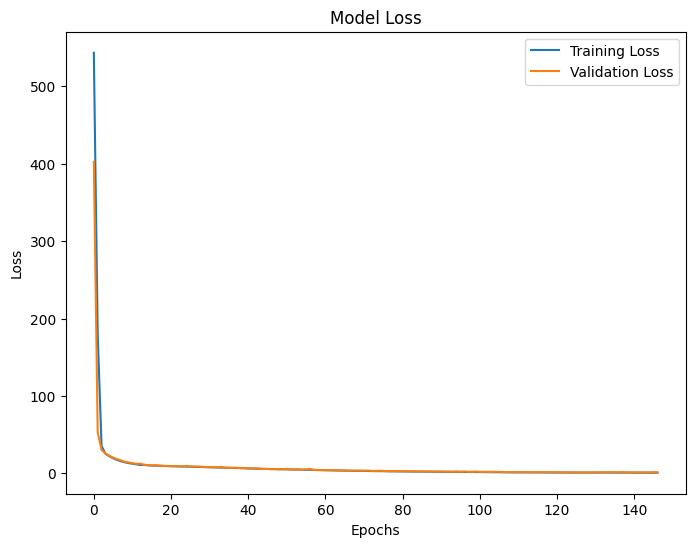

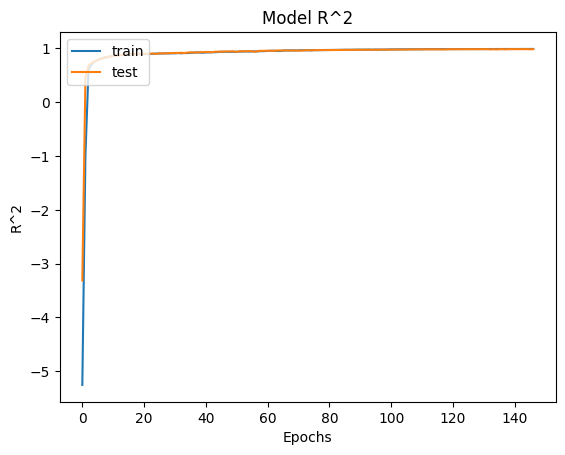

In [21]:
#Plot training curve for loss function
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plot training curve for R^2
plt.plot(history.history['r_square'], label='Training R^2')
plt.plot(history.history['val_r_square'], label='Validation R^2')
plt.title('Model R^2')
plt.ylabel('R^2')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Results

###Predictions

In [22]:
#Make predictions for the outputs on the test set
y_pred = model.predict(X_test, batch_size=32)

#Print the predicted values
print(y_pred)

5/5 [==============================] - 0s 4ms/step
[[16.462584  16.052391 ]
 [13.078541  15.6378355]
 [33.342766  33.35758  ]
 [42.359493  42.602757 ]
 [16.513758  19.42212  ]
 [23.433487  25.666605 ]
 [24.974186  25.260246 ]
 [29.449686  30.115805 ]
 [18.807142  21.688128 ]
 [28.965801  32.23982  ]
 [18.544754  21.326536 ]
 [32.775253  33.460938 ]
 [28.978624  31.839994 ]
 [10.396835  13.142704 ]
 [18.619242  21.434008 ]
 [36.14697   36.58568  ]
 [35.965076  35.755836 ]
 [12.072843  14.643847 ]
 [14.521412  16.535604 ]
 [32.647797  33.630085 ]
 [29.131285  30.85441  ]
 [41.781612  44.567078 ]
 [11.45671   14.344481 ]
 [36.114014  38.193836 ]
 [14.758964  18.009466 ]
 [37.087387  38.625137 ]
 [36.09946   35.87597  ]
 [28.91555   31.118168 ]
 [17.006695  20.382177 ]
 [14.140398  14.790274 ]
 [10.578796  13.551491 ]
 [12.476584  15.196126 ]
 [16.6807    19.898188 ]
 [26.4469    30.517862 ]
 [35.82683   40.2067   ]
 [29.016724  29.481062 ]
 [32.811295  34.162094 ]
 [36.12193   35.99886  ]

In [23]:
#Reshape the predictions and test data for regression analysis
y_test = y_test.to_numpy()

###Linear regression graph

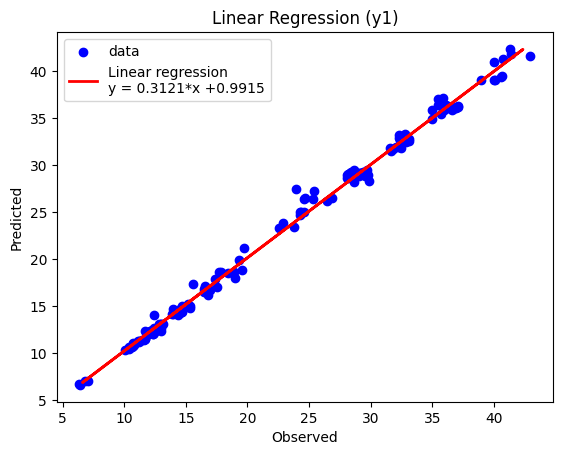

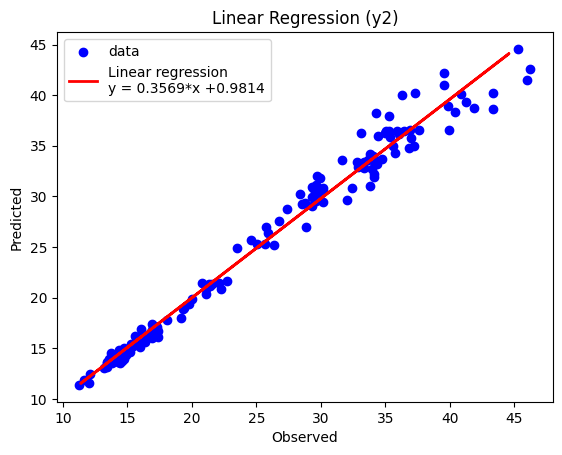

In [24]:
#Perform linear regression and display datapoints for each output
from sklearn.linear_model import LinearRegression

for i in range(2):
    regressor = LinearRegression()
    regressor.fit(y_test[:, i].reshape(-1, 1), y_pred[:, i])
    y_fit = regressor.predict(y_pred[:, i].reshape(-1, 1))

    reg_intercept = round(regressor.intercept_, 4)
    reg_coef = round(regressor.coef_.flatten()[0], 4)
    reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

    plt.scatter(y_test[:, i], y_pred[:, i], color='blue', label='data')
    plt.plot(y_pred[:, i], y_fit, color='red', linewidth=2, label='Linear regression\n' + reg_label)
    plt.title(f'Linear Regression (y{i+1})')
    plt.legend()
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()

In [25]:
for i in range(2):
  # Calculate the MSE and RMSE for each output
  mse = mean_squared_error(y_test[:, i], y_fit)
  rmse = np.sqrt(mse)

  # Calculate the R-squared value for each output
  r_squared = r2_score(y_test[:, i], y_fit)

  # Print the MSE, RMSE, and R-squared values for each output
  print(f'MSE for y{i+1}: {mse}')
  print(f'RMSE for y{i+1}: {rmse}')
  print(f'R-squared for y{i+1}: {r_squared}')

MSE for y1: 7.837476926656421
RMSE for y1: 2.7995494149338427
R-squared for y1: 0.9248076775673045
MSE for y2: 1.8633004835787266
RMSE for y2: 1.3650276493825049
R-squared for y2: 0.9798903944604466


###Prediction error

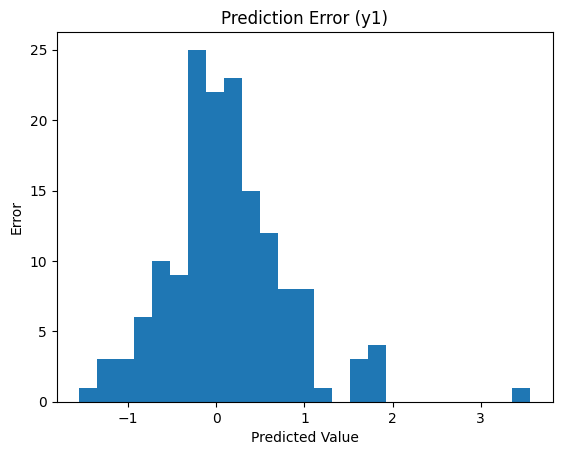

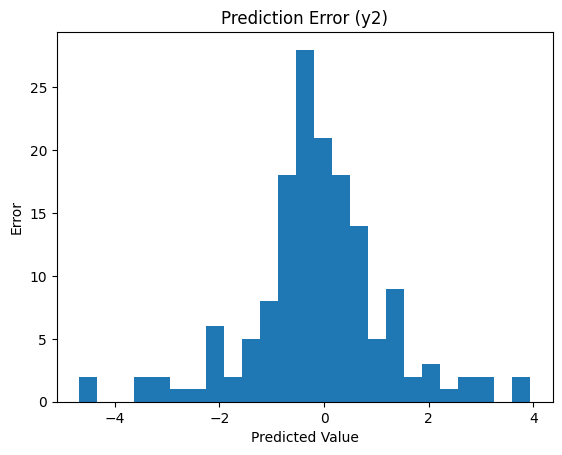

In [26]:
#Calculate the prediction error
prediction_error = y_pred - y_test

#Plot the prediction error as a histogram for each output
for i in range(2):
    plt.hist(prediction_error[:, i], bins=25)
    plt.title(f"Prediction Error (y{i+1})")
    plt.xlabel("Predicted Value")
    plt.ylabel("Error")
    plt.show()

In [27]:
model.save("/content/drive/MyDrive/Colab_Notebooks/Model/energy_efficiency_model.h5")